In [1]:
import khet
import random
import pylab as plt
%load_ext line_profiler
%load_ext memory_profiler

In [2]:
%%time
# Setup the game board
game_board = khet.engine.board.GameBoard('classic')

CPU times: user 78 µs, sys: 3 µs, total: 81 µs
Wall time: 85.1 µs


In [3]:
%%timeit
_ = khet.engine.evaluate_board_simple(game_board._board, 'red')

7.46 µs ± 86.6 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
game_board.board_repr()

'Sdra0.Adre0.Pdrf0.Adrg0.prrh0.pdrc1.plsd2.pura3.pdsc3.Slre3.Surf3.prrh3.plsj3.prra4.plsc4.Srse4.Sdsf4.purh4.pdsj4.prrg5.push6.plsc7.Ausd7.Puse7.Ausf7.Susj7.'

In [5]:
%%time
ngames = 1000
for game in range(ngames):
    # Setup the game board
    game_board = khet.engine.board.GameBoard("classic")

    # Number of turns before stopping
    n_turns = 100
    nturn = 0
    pharaoh_exists = True

    # Loop through turns
    while pharaoh_exists and nturn < n_turns:
        for color in ["silver", "red"]:
            options = game_board.get_all_valid_moves(color)
            piece_index = random.randint(0, len(options) - 1)
            move_index = random.randint(0, len(options[piece_index][1]) - 1)

            piece, moves = options[piece_index]
            move, rotation = moves[move_index]

            # move piece
            game_board.move_piece(
                options[piece_index][0].position, direction=move, rotation=rotation
            )

            # End turn
            game_board.end_turn(color)

            pharaoh_exists = game_board.is_game_over()

            nturn += 1

CPU times: user 3.53 s, sys: 12.6 ms, total: 3.54 s
Wall time: 3.55 s


In [6]:
f = options[0][1]

In [7]:
def print_board(board):
    for row in board._board:
        row_name = ''
        for k in row:
            if k:
                if k.__name__ in ["Pyramid", "Sphinx"]:
                    row_name += k.__name__[:1].lower()
                else:
                    row_name += k.__name__[:1]
            else:
                row_name += "."

        print (row_name)

    print ()
    orientations = ["A", ">", "V", "<"]

    for row in board._board:
        row_name = ''
        for k in row:
            if k:
                row_name += orientations[k.orientation]
            else:
                row_name += "."

        print (row_name)

In [8]:
%%time
ngames = 1000
nturn_list = []
winners = []
for game in range(ngames):
    # Setup the game board
    game_board = khet.engine.board.GameBoard("classic")

    # Number of turns before stopping
    n_turns = 500
    nturn = 0
    pharaoh_exists = True

    # Loop through turns
    while pharaoh_exists and nturn < n_turns:
        for color in ["silver", "red"]:
            options = game_board.get_all_valid_moves(color)
            piece_index = random.randint(0, len(options) - 1)
            move_index = random.randint(0, len(options[piece_index][1]) - 1)

            piece, moves = options[piece_index]
            move, rotation = moves[move_index]

            # move piece
            game_board.move_piece(
                options[piece_index][0].position, direction=move, rotation=rotation
            )

            # End turn
            game_board.end_turn(color)

            #
            active_pieces = [
                piece
                for row in game_board._board
                for piece in row
                if piece and piece.__name__ == 'Pharaoh'
            ]
            
            if len(active_pieces) < 2:
                pharaoh_exists = False
                
                try:
                    if active_pieces[0].color == 'red':
                        winners.append('silver')
                    else:
                        winners.append('red')
                except:
                    winners.append(None)
                    
                break

            nturn += 1
            
    nturn_list.append(nturn)
    if nturn == n_turns:
        winners.append(None)

CPU times: user 3.47 s, sys: 11.1 ms, total: 3.48 s
Wall time: 3.49 s


In [9]:
def simulate_game(n_turns=100):
    board_state = []
    board_scores = []
    pharaoh_exists = True
    nturn = 0
    game_board = khet.engine.board.GameBoard("classic")
    while pharaoh_exists and nturn < n_turns:
        for color in ["silver", "red"]:
            options = game_board.get_all_valid_moves(color)
            piece_index = random.randint(0, len(options) - 1)
            move_index = random.randint(0, len(options[piece_index][1]) - 1)

            piece, moves = options[piece_index]
            move, rotation = moves[move_index]

            # move piece
            game_board.move_piece(
                options[piece_index][0].position, direction=move, rotation=rotation
            )

            # End turn
            game_board.end_turn(color)

            # Check if the game is over
            pharaoh_exists = game_board.is_game_over()
            
            board_state.append(game_board.board_repr())
            board_scores.append(khet.engine.evaluate_board_simple(game_board._board, color))
            nturn += 1
            
    return nturn, board_state, board_scores

In [10]:
results = [simulate_game() for i in range(100)]

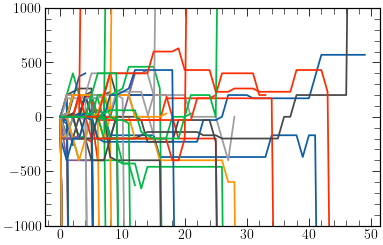

In [12]:
plt.figure()
for res in results:
    plt.plot(res[-1][::2])
    
plt.ylim([-1000, 1000])
plt.show()

## Alpha-beta pruning

In [103]:
from copy import deepcopy

class TicTacToe:
    def __init__(self, x=3, y=3):
        """
        """
        self.x = x
        self.y = y
        self._board = [
            [None for _ in range(y)] for _ in range(x)
        ]
        
    def get_all_valid_moves(self):
        """
        """
        moves = []
        for xi in range(self.x):
            for yi in range(self.y):
                if self._board[xi][yi] is None:
                    moves.append((xi, yi))
                    
        return moves[::-1]
    
    
def evaluate_board_simple(board, color):
    """
    """
    score = 0
    for ri, row in enumerate(board._board):
        for si, square in enumerate(row):
            if square:
                score 
                
    return score

def make_move(board, move, color):
    """
    """
    bb = deepcopy(board)
    if bb._board[move[0]][move[1]] is None:
        bb._board[move[0]][move[1]] = color

    return bb

In [195]:
import math

transposition_table = {}


def alpha_beta_search(
    board, depth, alpha=-math.inf, beta=math.inf, maximizing_player=True
):
    if depth == 0:
        return evaluate_board_simple(board), None

    # Get all of the potential legal moves
    legal_moves = board.get_all_valid_moves()

    if maximizing_player:
        max_eval = float("-inf")
        best_move = None
        for move in legal_moves:
            new_board = make_move(board, move)
            eval_score, _move = alpha_beta_search(
                new_board, depth - 1, alpha, beta, False
            )
            if eval_score > max_eval:
                max_eval = eval_score
                best_move = move
            alpha = max(alpha, eval_score)
            if beta <= alpha:
                break  # Beta cutoff

        return max_eval, best_move

    else:
        min_eval = float("inf")
        best_move = None
        for move in legal_moves:
            new_board = make_move(board, move)
            eval_score, _move = alpha_beta_search(
                new_board, depth - 1, alpha, beta, True
            )
            if eval_score < min_eval:
                min_eval = eval_score
                best_move = move
            beta = min(beta, eval_score)
            if beta <= alpha:
                break  # Alpha cutoff

        return min_eval, best_move

In [196]:
board = Board()
board._board[0][0] = 1
board._board[1][0] = 1
board._board[1][1] = 1
board._board[0][1] = 1

In [204]:
%%time
s = alpha_beta_search(board, 2)

CPU times: user 10.3 ms, sys: 775 µs, total: 11.1 ms
Wall time: 10.7 ms


In [205]:
s

(-11.071067811865476, (2, 0))

In [206]:
%memit

peak memory: 88.74 MiB, increment: 0.02 MiB


In [127]:
from string import ascii_lowercase
import random

In [177]:
keys = {
    j: i for i, j in enumerate(ascii_lowercase)
}
moves = {}

In [178]:
def irange(n=2):
    """
    """
    key = "".join(
        [ascii_lowercase[random.randint(0, len(ascii_lowercase) - 1)] for _ in range(n)]
    )
    if key in moves:
        return -1
    else:
        score = 0
        for k in key:
            score += keys[k]
        
        moves[key] = score
        return irange()

In [194]:
irange()
len(moves)

101